# Классификация (часть 1)

> 🚀 В этой практике нам понадобятся: `numpy==1.26.4, pandas==2.2.2, scikit-learn==1.4.2`

> 🚀 Установить вы их можете с помощью команды: `%pip install numpy==1.26.4 pandas==2.2.2 scikit-learn==1.4.2`


## Содержание

* [Задача классификации](#Задача-классификации)
* [Кодирование строк из целевой колонки](#Кодирование-строк-из-целевой-колонки)
* [Обратно к нашим пандам](#Обратно-к-нашим-пандам)
* [Классификация по-взрослому](#Классификация-по-взрослому)
* [Выводы](#Выводы)
* [Вопросы для закрепления](#Вопросы-для-закрепления)
* [Вопросы для подумать](#Вопросы-для-подумать)
* [Полезные ссылки](#Полезные-ссылки)


Всем привет!

Сегодня мы поговорим про такого зверя в машинном обучении, как **классификация**.

Скорее всего из самого названия уже понятно, что мы будем что-то разделять на группы, то есть классифицировать.

Каждый день мы, будучи человеками, сталкиваемся с классификацией и наша локальная нейронка (мозг) решает эту задачу с разной степенью удачливости. Например, разделение носков по цветам или разделение писем на спам и полезную информацию.

При обучении мы говорим модели верные категории, чтобы она смогла найти какие-то зависимости и при предсказании выдавать нам верные результаты.

In [1]:
# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Задача классификации

Задача классификации - это правильно определить категорию объекта/ответа на основе набора признаков.

Например, мы можем спросить систему: "А будет ли сегодня дождь?", и она на основе прогноза погоды ответит "Да, капитан" или "Нет".

Когда у нас есть всего 2 класса в категории, она называется **бинарной**.

> Легко запомнить, если провести аналогию с бинарным машинным кодом, который состоит только из нулей и единиц.

Давайте представим, что у нас есть данные о 1000 животных 2-х типов:
* панды
* котики

Если человека попросить угадать тип животного и сказать ему, что у этого животного длинный хвост и оно относительно маленького размера, то человек мыслящий без сомнений скажет, что это Кот. Ну, либо генно-модифицированная панда, но это уже скорее выброс в данных, и на такие примеры мы смотреть не будем.

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/20_cat_image.jpg" width=400/></p>

Допустим у нас есть панды и коты, у каждого животного в качестве фич выступает информация о:

* длине хвоста
* размере тела

Давайте посмотрим, что у нас за таблица с данными есть на входе:

In [2]:
from sklearn.datasets import make_blobs

X_data, y_data = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=2,
    random_state=RANDOM_SEED)
X_data += 20

df = pd.DataFrame(X_data, columns=["Длина хвоста, см", "Размер тела"])
df["Класс"] = pd.Series(y_data).map({0: "кот", 1: "панда"})

df.head()

,"Длина хвоста, см",Размер тела,Класс
0,18.326494,27.884579,кот
1,26.317580,21.419581,панда
2,23.543604,20.533119,панда
3,25.162714,21.399470,панда
4,24.459399,25.166277,панда


Шикарно, в целом ничего экзотического, какие-то цифры в фичах ("Длина хвоста, см", "Размер тела"), а целевая колонка ("Класс") - это строка, которая говорит тип животного.

Но теперь взглянем на точки в плоскости. Там может быть что-то интересное.

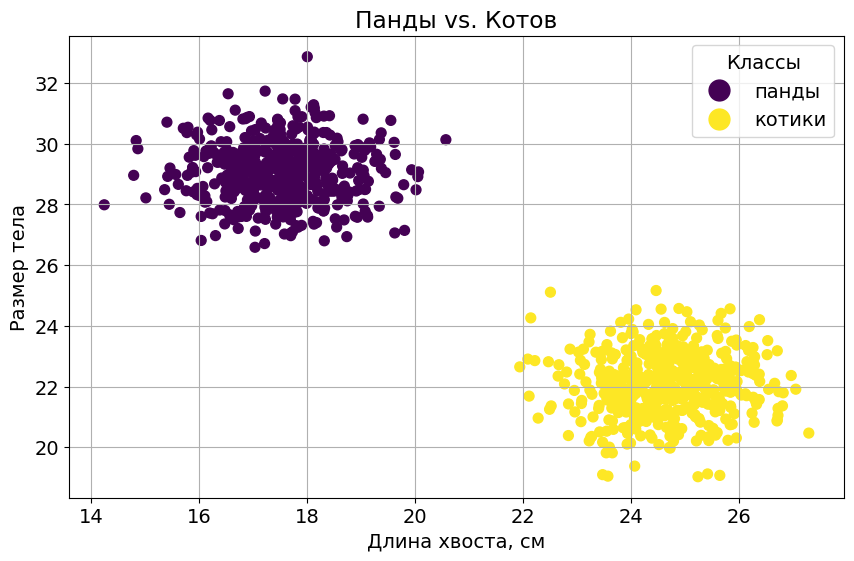

In [3]:
plt.figure(figsize=[10, 6])
scatter = plt.scatter(df["Длина хвоста, см"], df["Размер тела"], c=y_data, marker="o", s=50)
legend = plt.legend(*scatter.legend_elements(), loc="upper right", title="Классы")
legend.get_texts()[0].set_text("панды")
legend.get_texts()[1].set_text("котики")
plt.xlabel("Длина хвоста, см")
plt.ylabel("Размер тела")
plt.title("Панды vs. Котов")
plt.grid(True)
plt.show()

Пам-пам! Наша локальная нейронка уже наверняка разделила точки на группы.
Ну, и если подумать, панды действительно больше котов, а их хвосты гораздо короче.

Но важно ещё раз подчеркнуть тот факт, что в задаче регрессии модель стремилась повторить зависимость из данных, т.е. продлить линию в зависимости от значения фич.

В задаче классификации, ничего продлевать не нужно, а нужно уметь разделять данные на могучие кучки.

## Кодирование строк из целевой колонки

Прежде чем идти дальше, давайте ещё раз посмотрим на нашу входную таблицу, а именно на целевую колонку "Класс":

In [4]:
df.head()

,"Длина хвоста, см",Размер тела,Класс
0,18.326494,27.884579,кот
1,26.317580,21.419581,панда
2,23.543604,20.533119,панда
3,25.162714,21.399470,панда
4,24.459399,25.166277,панда


Вроде всё в порядке? Можем даже посмотреть количество панд и котиков.

In [5]:
df["Класс"].value_counts()

,count
Класс,
кот,500
панда,500


Ващее, красота. Всех поровну. Мечта любого дата-саентиста!

Однако, всё было бы хорошо, если бы не одно **НО**.

Строки "панда" и "кот" очень удобны для человека, но модель-то хочет цифры. Поэтому важно правильно закодировать наши категории/строки, для того, чтобы модель дальше могла работать с нашими данными.

Для этого не нужно придумывать велосипед, всё уже давно придумано за нас.

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) умеет кодировать категории целевой колонки (они же лейблы) в цифры, которые так жаждет получить наша будущая модель.

> Этот энкодер применяется для кодирования целевой переменной, не надо его натравливать на что ни попадя, иначе ваши будущие коллеги могут сбросить вас со скалы.

> ⚠️ Еще раз обращаем внимание - модели машинного обучения не умеют просто так переваривать строки, картинки, аудио и т.д. Их надо специальным образом подготавливать. Модели ML умеют работать только с числами - это очень важно запомнить!

Давай с помощью LabelEncoder закодируем наших панд и котов, а также добавим новую колонку - "target", в нашу таблицу.

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df["Класс"])

df["target"] = encoded_target

df.head()

,"Длина хвоста, см",Размер тела,Класс,target
0,18.326494,27.884579,кот,0
1,26.317580,21.419581,панда,1
2,23.543604,20.533119,панда,1
3,25.162714,21.399470,панда,1
4,24.459399,25.166277,панда,1


Можно видеть, что закодированная панда - это 1, а закодированный кот - 0.

Всё как мы и хотели, а делов-то всего на 2 строчки кода.

## Обратно к нашим пандам

Давайте ещё раз посмотрим на наши точки на плоскости, только теперь уже панд будем называть кодовым именем - 1, а котиков - 0.

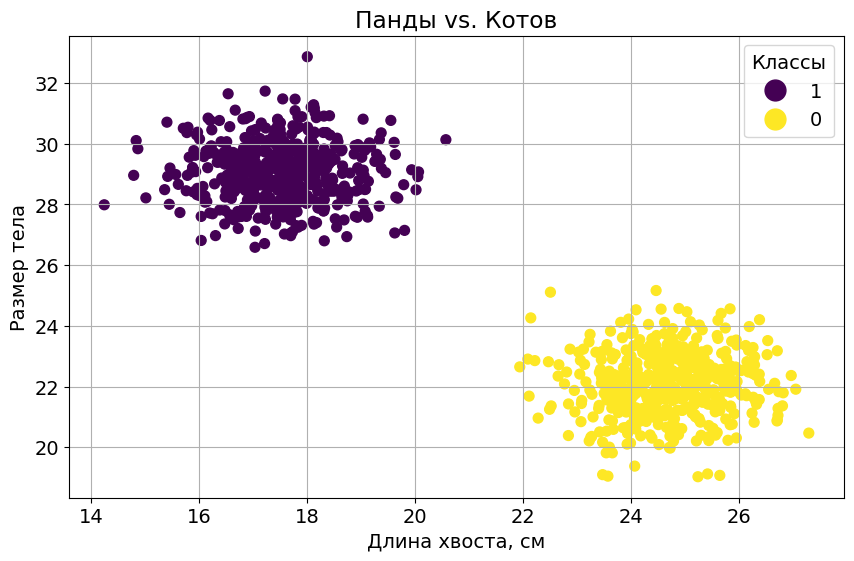

In [7]:
plt.figure(figsize=[10, 6])
scatter = plt.scatter(df["Длина хвоста, см"], df["Размер тела"], c=df["target"], marker="o", s=50)
legend = plt.legend(*scatter.legend_elements(), loc="upper right", title="Классы")
legend.get_texts()[0].set_text("1")
legend.get_texts()[1].set_text("0")
plt.xlabel("Длина хвоста, см")
plt.ylabel("Размер тела")
plt.title("Панды vs. Котов")
plt.grid(True)
plt.show()

Мы хотим получить такую модель, которая умела бы классифицировать панд и котов. Т.е. как бы проводить линию между ними. Что-то типа такого

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/clf_blobs.png" height=600/></p>

То есть всё, что выше линии - это 1 (панда), а всё, что ниже - 0.

In [8]:
# Давайте по заветам правильной практики разделим выборку на обучение и тестирование
from sklearn.model_selection import train_test_split

# проверка коэффициентов делается на обучающей выборке
train_df, test_df = train_test_split(df, test_size=0.3, random_state=RANDOM_SEED)

print(f"Train data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Train data shape: (700, 4)
Test data shape: (300, 4)


## TODO 1: Написать код, который оптимально ищет коэффициенты W1, W2 и B, подобрать их так, чтобы линия правильно разделяла группы точек.

In [11]:
from sklearn.svm import SVC


# Extract features and target
X = train_df[["Длина хвоста, см", "Размер тела"]].values
y = train_df["target"].values

# Train a linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Extract the coefficients and intercept
W1 = svm.coef_[0][0]
W2 = svm.coef_[0][1]
B = svm.intercept_[0]

# Ensure W1 > 0
if W1 < 0:
    W1, W2, B = -W1, -W2, -B

print(f"W1: {W1}, W2: {W2}, B: {B}")

W1: 0.4722695234136518, W2: -0.3563099629908102, B: -0.6807692978667106


Теперь представьте, что вы модель линейной регрессии, как мы помним формула для неё будет иметь вид: $z = w_1 * x_1 + w_2 * x_2 + b$.

> Так как у нас плоскость с точками $x_2(x_1)$, то можно сказать, что значение $z$ в точках на красной прямой будет равно 0, и тогда чтобы построить прямую на плоскости, мы можем вывернуть уравнение следующим образом: $x_2 = -(w_1 * x_1 + b) / w_2$.

Ваша задача найти такие коэффициенты (веса и биас), чтобы прямая линия делила животных на правильные группы. Удачи!

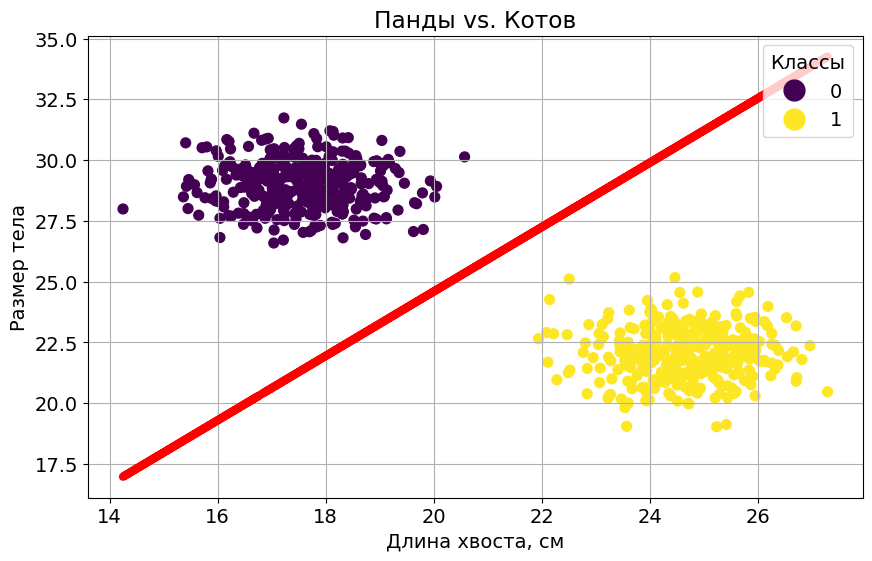

In [12]:
# TODO: Select the coefficients W1, W2 and B so that the line correctly separates the groups of points (W1>0)
#W1, W2, B = (10, 11, -500)
# NOTE: W1 > 0
#assert W1 > 0

def plot_line(df, w1, w2, b):
    _test_x1 = df["Длина хвоста, см"]
    _test_x2 = -(w1 * _test_x1 + b) / w2

    plt.figure(figsize=[10, 6])
    plt.plot(_test_x1, _test_x2, linewidth=6, color="r")

    scatter = plt.scatter(train_df["Длина хвоста, см"], train_df["Размер тела"], c=train_df["target"], marker="o", s=50)
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Классы")
    plt.xlabel("Длина хвоста, см")
    plt.ylabel("Размер тела")
    plt.title("Панды vs. Котов")
    plt.grid(True)
    plt.show()

plot_line(train_df, W1, W2, B)


Красота, всё вышло!

Но зачем же нам тут линейная регрессия, если мы говорим о задаче классификации.

Давайте попробуем применить известную нам линейную регрессию, чтобы предсказать значения. Да, сейчас это не совсем понятно, зачем, если мы не пытаемся повторить какую-то зависимость, но пока просто доверьтесь!

In [ ]:
# TODO - напишите функцию lin_reg_prediction() - предсказание линейной регрессии
#   Аргументы:
#       df - DataFrame с данными
#       w1 - вес для признака "Длина хвоста, см"
#       w2 - вес для признака "Размер тела"
#       b - bias для модели линейной регрессии
#   Результат:
#       Предсказание на основе признаков и весов (z)

# TODO 2 - напишите функцию lin_reg_prediction() - предсказание линейной регрессии


In [13]:
def lin_reg_prediction(df, w1, w2, b):
    """
    Perform linear regression prediction.

    Arguments:
        df - DataFrame with data containing columns "Длина хвоста, см" and "Размер тела"
        w1 - weight for the feature "Длина хвоста, см"
        w2 - weight for the feature "Размер тела"
        b - bias for the linear regression model

    Returns:
        z - prediction based on the features and weights
    """
    # Extract the features from the DataFrame
    x1 = df["Длина хвоста, см"]
    x2 = df["Размер тела"]

    # Compute the linear regression prediction
    z = w1 * x1 + w2 * x2 + b

    return z

In [14]:
# TEST

_test_df = pd.DataFrame({
    "Длина хвоста, см": [0., 1, 2, 3, 4],
    "Размер тела": [3, 4, 5., 6, 7]
})

_test_result = lin_reg_prediction(_test_df, 3, 1, 2)

np.testing.assert_almost_equal(_test_result, [5, 9, 13, 17, 21])

print("Well done!")

Well done!


In [15]:
lin_reg_pred = lin_reg_prediction(train_df, W1, W2, B)

_sample_df = pd.DataFrame({"ligreg": lin_reg_pred, "target": train_df["target"]})
_sample_df.head(20)

,ligreg,target
541,-3.300021,0
440,-2.349039,0
482,3.151907,1
422,-2.672475,0
778,2.624916,1
949,-1.846663,0
334,-2.416068,0
576,2.998965,1
934,-2.902899,0
567,3.600638,1


Вы можете не заметить ничего важного, но если обратить внимание на знак, то можно понять, что там, где target == 1, предсказание больше 0. В ином случае меньше нуля.

Это наводит на мысль, что с помощью линейной регрессии мы смогли предсказать число, которое знаком отличает одно число от другого, вау!

И вот тут можно было бы просто взять знак предсказания, но это будет только 0 или 1, а мы работаем с математикой, вероятностями и всяким таким! Умные люди уже подумали за нас и все придумали.

Давайте попробуем взять следующую функцию и применить ее на наши предсказания:

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/20_sigmoid_function.svg" width=600/></p>

Вот там и формула написана!

In [16]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_linreg_prediction(df, w1, w2, b):
    z = lin_reg_prediction(df, w1, w2, b)
    # И еще дополнительно сравним со средним сигмоиды, ведь выход сигмоиды - число от 0 до 1, на нам нужны только крайние значения - 0 или 1
    y = sigmoid(z) > 0.5
    return y.astype(int)

sigmoid_pred = sigmoid_linreg_prediction(train_df, W1, W2, B)

_sample_df["sigmoid"] = np.round(sigmoid_pred, 3)
_sample_df.head(20)

,ligreg,target,sigmoid
541,-3.300021,0,0
440,-2.349039,0,0
482,3.151907,1,1
422,-2.672475,0,0
778,2.624916,1,1
949,-1.846663,0,0
334,-2.416068,0,0
576,2.998965,1,1
934,-2.902899,0,0
567,3.600638,1,1


Вот так, из каких-то чисел мы получили предсказания от 0 до 1, которое говорит, к какому классу ближе относится предсказание.

Так для чего мы проделывали все эти махинации? Да просто потому что бинарная классификация состоит из 2-х частей:
* линейная регрессия
* сигмоида

Такая модель называется **логистической регрессией**. Как мы видели, с точки зрения разделения на классы она является линейной, так как разделяет прямой линией.

> 🤓 Сырые значения после линейной регрессии называются **logits**

Основная особенность сигмоиды в том, что в $х = 0.5$ эта функция имеет значение 0. Снизу она стремится к нулю, а сверху к единице. Но что тут сильно об этом разглагольствовать, вы и так всё это видите на графике.

Вот в общем-то и решение задачи классификации.

Давайте получим предсказание на тестовой выборке

In [17]:
y_pred = sigmoid_linreg_prediction(test_df, W1, W2, B)

Но остался один важный момент - оценка работы модели. Как нам понять всё ли верно мы сделали, и действительно ли модель умеет предсказывать. Наверняка, первое, что приходит в голову - это слово "точность". Так давайте её и посчитаем.

Точность (accuracy) - это метрика, которая рассчитывается по следующей формуле:

$$Точность = \frac{\text{кол-вo правильных предсказаний}}{\text{oбщее кол-во сэмплов}}$$

Например, если у нас есть 10 животных, из них модель предсказала 5 правильно, а в остальных ошиблась, то точность работы такой модели будет составлять:
$$Accuracy = \frac{5}{10}=0.5$$

Итак, теперь мы знаем как посчитать точность, давайте считать.

Найдём количество верных предсказаний

In [ ]:
# TODO - напишите функцию вычисления точности предсказаний compute_accuracy()
#   Она должна принимать y_true - вектор иистинных классов, y_pred - вектор предсказанных классов

# TODO 3 - напишите функцию вычисления точности предсказаний compute_accuracy()

In [18]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
        y_true - vector of true classes
        y_pred - vector of predicted classes

    Returns:
        accuracy - the accuracy of the predictions
    """
    # Ensure the input vectors are of the same length
    if len(y_true) != len(y_pred):
        raise ValueError("The length of y_true and y_pred must be the same.")

    # Compute the number of correct predictions
    correct_predictions = sum(true == pred for true, pred in zip(y_true, y_pred))

    # Compute the accuracy
    accuracy = correct_predictions / len(y_true)

    return accuracy

In [19]:
# TEST

_test_y_true = np.array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])
_test_y_pred = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

_test_result = compute_accuracy(_test_y_true, _test_y_pred)

np.testing.assert_almost_equal(_test_result, 0.5454545454545454)

print("Well done!")

Well done!


In [20]:
accuracy = compute_accuracy(test_df["target"], y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# Еще одна проверка Accuracy

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(_test_y_true, _test_y_pred)


0.5454545454545454

In [22]:
accuracy_score(test_df["target"], y_pred)

1.0

Воу, из нас вышла вполне себе уверенная модель! Поздравляю!

Итак, что мы только что поняли:
* модель отказывается переваривать строки, поэтому их нужно перевести (закодировать) в числа;
* классификация - это не страшно, соединяем линейную регрессию и сигмоиду, радуемся!

## Классификация по-взрослому

Давайте теперь возьмём данные, которые чуть больше перемешаны между собой. Ибо разделить две кучки может даже кото-панда.

In [23]:
from sklearn.datasets import make_classification

X_data, y_data = make_classification(
    n_samples=900,
    n_features=2,
    n_redundant=0,
    random_state=RANDOM_SEED)

df = pd.DataFrame(X_data, columns=["Feature_1", "Feature_2"])
df["target"] = y_data

df.head()

,Feature_1,Feature_2,target
0,-1.352061,-0.645183,0
1,-1.000462,1.404170,0
2,-0.543744,-1.739741,0
3,-0.925201,1.003992,0
4,-0.119757,1.191586,0


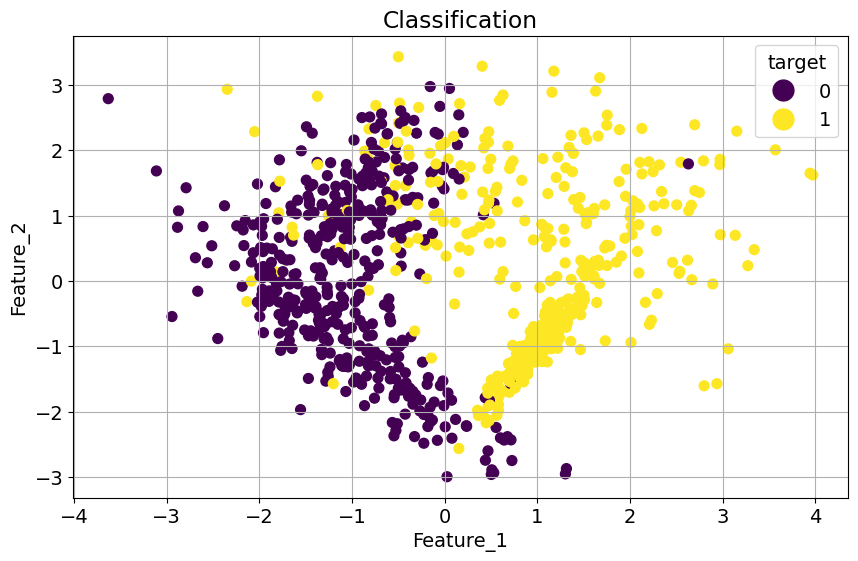

In [24]:
plt.figure(figsize=[10, 6])
scatter = plt.scatter(df["Feature_1"], df["Feature_2"], c=df["target"], marker="o", s=50)
legend = plt.legend(*scatter.legend_elements(), loc="upper right", title="target")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("Classification")
plt.grid(True)
plt.show()

Здесь уже не всё так очевидно, как с пандами.

Но есть хорошая новость, целевая переменная `target` уже представлена цифрами, так что кодировать её больше никуда не надо. Внутренний прокрастинатор ликует!

Дальше разделим данные на обучающую и тестовую выборки.

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3)

print(f"Train data shape: {train_df.shape}")
print(f"Test data shape:  {test_df.shape}")

Train data shape: (630, 3)
Test data shape:  (270, 3)


In [26]:
print("--- Train Data ---")
print(train_df.target.value_counts())
print("--- Test Data ---")
print(test_df.target.value_counts())

--- Train Data ---
target
0    330
1    300
Name: count, dtype: int64
--- Test Data ---
target
1    148
0    122
Name: count, dtype: int64


Убедились, что количество классов примерно сбалансировано. Огонь!

До этого мы с вами писали решение задачи классификации руками, но ещё одна хорошая новоть в том, что умные люди уже давно сделали это за нас. Есть класс [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) в sklearn.

У него такой же интерфейс, как и у класса LinearRegression, что приятно и удобно.

Но почему такое название? Всё просто, задачу классификации называют логистической регрессией:
* слово "регрессия" берётся из-за линейной регресиии
* "логистическая", потому что сигмоиду ещё называют "логистической функцией"

Вот и весь секрет.

Давай сейчас обучим модель и получим предсказания.

In [27]:
from sklearn.linear_model import LogisticRegression

# создаём объект модели
model = LogisticRegression(random_state=RANDOM_SEED)

x_columns = ["Feature_1", "Feature_2"]

y_train = train_df["target"]
x_train = train_df[x_columns]

# обучаем модель на обучающей выборке
model.fit(x_train, y_train)

y_test = test_df["target"]
x_test = test_df[x_columns]

# получаем предсказания на тестовой выборке
y_pred = model.predict(x_test)

print("Prediction is completed!")

Prediction is completed!


Ну, и, конечно, следующий шаг - это оценить нашу модель.

Считаем точность, но так как все знают, что программисты - это самые ленивые люди на Земле, давайте возьмём готовую реализацию [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) из sklearn.

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9


Хмм, уже не 1.0 как в предыдущем детсадовском случае.

Так как у нас всего две фичи, мы можем визуализировать наше предсказание.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


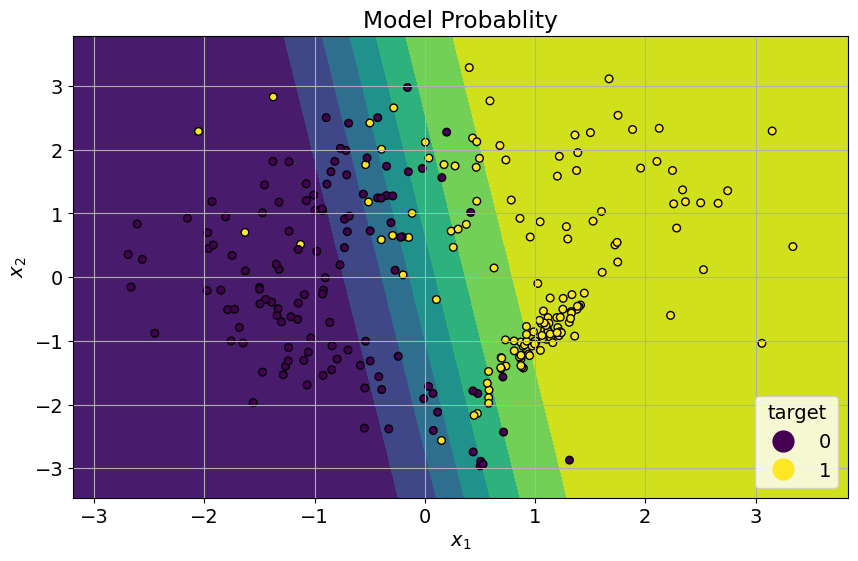

In [29]:
def render_binary_decision_plane(df):
    x1_vals = np.linspace(df.iloc[:, 0].values.min()-0.5, df.iloc[:,0].values.max()+0.5, 100)
    x2_vals = np.linspace(df.iloc[:,1].values.min()-0.5, df.iloc[:,1].values.max()+0.5, 100)
    xx, yy = np.meshgrid(x1_vals, x2_vals)

    y_pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    y_pred = y_pred.reshape(xx.shape)

    plt.figure(figsize=[10, 6])
    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(df.iloc[:, 0].values, df.iloc[:, 1].values, c=df.target, s=30, edgecolor="k")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    legend = plt.legend(*pnts_scatter.legend_elements(), loc="lower right", title="target")
    plt.title("Model Probablity")
    plt.show()

render_binary_decision_plane(test_df)

Что происходит на этом графике?

Мы как бы влезли в "мозг" нашей модели и видим, насколько она уверена в своём решении. Там, где явно жёлтая или фиолетовая область - модель бьёт себя в грудь и как бы говорит: "Отвечаю за своё решение!" (правда это не мешает ей делать ошибки)

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/20_bazar_meme.jpg"/></p>

А вот по мере приближения к центральной области (зеленый-бирюзовый) уверенность модели падает - вот тут проходит граница решения (центр сигмоиды).

И напоследок, давайте ещё немного поковыряемся в нашей модели. Благо разработчики sklearn дали нам такую возможность.

Мы можем посмотреть веса нашей модели

In [30]:
model.coef_

array([[2.57116193, 0.36811483]])

Можем посмотреть какие классы наша модель знает (полезно, при дисбалансе, таким образом можно выявить, что какие-то классы просто не вошли в выборку, а не зная классов, модель не может их предсказать).

In [31]:
model.classes_

array([0, 1])

Так как до обучения, мы проверили и подготовили выборки, то здесь сюрпризов не предвиделось.

## Выводы

В этот раз мы с вами начали щупать задачу классификации или же по-другому логистическую регрессию. Задача очень популярна на практике.

* Мы с вами подготовили выборки для обучения и тестирования
* обучили модель
* получили предсказания
* и с помощью метрики "точности" оценили работу модели

Уже звучит как полноценный пайплайн! С чем Вас и поздравляем

## Вопросы для закрепления

1. Чем отличается линейная регрессия от логистической?
2. Какой недостаток есть у метрики "точность"? В каком случае эта метрика попытается нас обмануть?
3. Можно ли с помощью LabelEncoder закодировать строки из столбца фич?

## Вопросы для подумать

1. Что покажет показатель точности, если мы ни один пример не угадали? Что это значит? Как простым действием улучшить результаты предсказаний в этом случае?
2. Как можно выполнить предсказания трех классов с помощью принципов, которые применяются в бинарной классификации?

## Полезные ссылки
* [Logistic Regression от StatQuest](https://www.youtube.com/watch?v=yIYKR4sgzI8)
* [Logistic Regression. Coefficients от StatQuest](https://www.youtube.com/watch?v=vN5cNN2-HWE)
* [Logistic Regression. Maximum Likelihood от StatQuest](https://www.youtube.com/watch?v=BfKanl1aSG0)
